# th2polyUSA
This tutorial illustrates how to create an histogram with polygonal
bins (TH2Poly), fill it and draw it using the `col` option. The initial data
are stored in TMultiGraphs. They represent the USA map. Such histograms can
be rendered in 3D using the option `legogl`.

The initial data have been downloaded from: http://www.maproom.psu.edu/dcw/
This database was developed in 1991/1992 and national boundaries reflect
political reality as of that time.




**Author:** Olivier Couet  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, May 15, 2024 at 09:46 AM.</small></i>

In [1]:
Int_t i, bin;
const Int_t nx = 48;
const char *states [nx] = {
   "alabama",      "arizona",        "arkansas",       "california",
   "colorado",     "connecticut",    "delaware",       "florida",
   "georgia",      "idaho",          "illinois",       "indiana",
   "iowa",         "kansas",         "kentucky",       "louisiana",
   "maine",        "maryland",       "massachusetts",  "michigan",
   "minnesota",    "mississippi",    "missouri",       "montana",
   "nebraska",     "nevada",         "new_hampshire",  "new_jersey",
   "new_mexico",   "new_york",       "north_carolina", "north_dakota",
   "ohio",         "oklahoma",       "oregon",         "pennsylvania",
   "rhode_island", "south_carolina", "south_dakota",   "tennessee",
   "texas",        "utah",           "vermont",        "virginia",
   "washington",   "west_virginia",  "wisconsin",      "wyoming"
};
Double_t pop[nx] = {
 4708708, 6595778,  2889450, 36961664, 5024748,  3518288,  885122, 18537969,
 9829211, 1545801, 12910409,  6423113, 3007856,  2818747, 4314113,  4492076,
 1318301, 5699478,  6593587,  9969727, 5266214,  2951996, 5987580,   974989,
 1796619, 2643085,  1324575,  8707739, 2009671, 19541453, 9380884,   646844,
11542645, 3687050,  3825657, 12604767, 1053209,  4561242,  812383,  6296254,
24782302, 2784572,   621760,  7882590, 6664195,  1819777, 5654774,   544270
};

TCanvas *usa = new TCanvas("USA", "USA");
usa->ToggleEventStatus();
Double_t lon1 = -130;
Double_t lon2 = -65;
Double_t lat1 = 24;
Double_t lat2 = 50;
TH2Poly *p = new TH2Poly("Lower48","Lower 48 Population (2009);Latitude;Longitude",lon1,lon2,lat1,lat2);

TFile::SetCacheFileDir(".");
TFile *f = TFile::Open("http://root.cern/files/usa.root", "CACHEREAD");

if (!f) {
   printf("Cannot access usa.root. Is internet working ?\n");
   return;
}

[TFile::Cp] Total 0.95 MB	|====================| 100.00 % [171.0 MB/s]
Info in <TFile::OpenFromCache>: using local cache copy of http://root.cern/files/usa.root [./files/usa.root]


Define the TH2Poly bins.

In [2]:
TMultiGraph *mg;
TKey *key;
TIter nextkey(gDirectory->GetListOfKeys());
while ((key = (TKey*)nextkey())) {
   TObject *obj = key->ReadObj();
   if (obj->InheritsFrom("TMultiGraph")) {
      mg = (TMultiGraph*)obj;
      bin = p->AddBin(mg);
   }
}

Fill TH2Poly, with capital letters for the states names

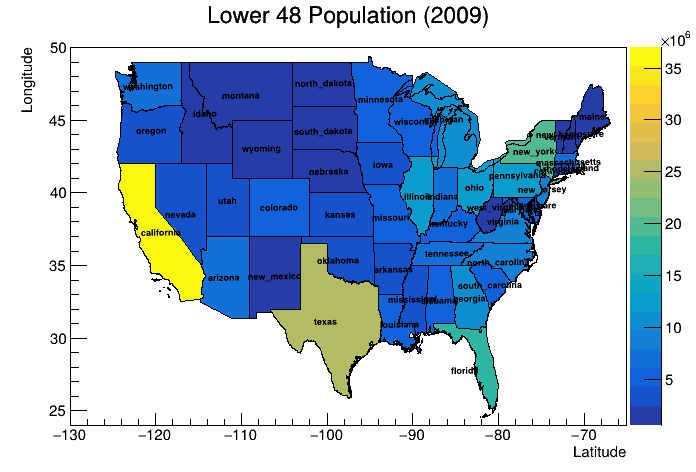

In [3]:
for (i=0; i<nx; i++) p->Fill(states[i], pop[i]);

gStyle->SetOptStat(0);
p->Draw("colz textn");

Add the reference for the population

In [4]:
TLatex pupulationRef(-128, 27, "#scale[.55]{#splitline{Source:}{http://eadiv.state.wy.us/pop/st-09est.htm}}");
pupulationRef.DrawClone();

Draw all canvases 

In [5]:
%jsroot on
gROOT->GetListOfCanvases()->Draw()